In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [81]:
#1
def cal_euc_dist(vector1,vector2):
    return np.sqrt(np.sum((vector1-vector2)**2)) 

In [82]:
#2
def cal_man_dist(vector1,vector2):
    return np.sum(np.abs(vector1-vector2))

In [83]:
#3
def cal_acc_gen(actual,predicted):
    acc=np.mean(actual==predicted)
    return acc,(1-acc)

In [84]:
#4
def cal_precision(t_pos,f_pos):
    return t_pos/(t_pos+f_pos)

def cal_recall(t_pos,f_neg):
    return t_pos/(t_pos+f_neg)

def cal_fpr(f_pos,t_neg):
    return f_pos/(t_neg+f_pos)

def cal_tpr(t_pos,f_neg):
    return t_pos/(t_pos+f_neg)

def cal_fscore(t_neg,f_pos,f_neg,t_pos):
    precision = cal_precision(t_pos,f_pos)
    recall = cal_recall(t_pos,f_neg)
    return 2*(precision*recall)/(precision+recall)



In [85]:
#5
def cal_con_matrix(actual,predicted):
    confusion_matrix = np.zeros((2,2),dtype=int)
    np.add.at(confusion_matrix,[actual,predicted],1)
    return confusion_matrix

In [86]:
#6
def plot_roc_curve(tpr,fpr):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', linewidth=8,label = None) 
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


In [87]:
#7
def get_auc(atpr,afpr):
    return np.trapz(atpr,afpr,dx=0.1,axis=0)
    

In [147]:
#8 #extra credits 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    plt.ylim([0, 1.1])
    plt.show()

In [89]:
#9
class knn_classifier():
    def fit(self,X,Y,n_neighbor,distance,thresh=0.5,weights="uniform",**kwargs):
        self.X = X 
        self.Y = Y
        self.n_neighbor = n_neighbor
        self.weights = weights
        self.distance=distance
        self.thresh=thresh
        
    def predict(self,X):
        target_values = self.Y
        values = np.zeros(shape=(X.shape[0],)).astype(int)
        k=self.n_neighbor
        distance=self.distance
        threshold = self.thresh
        weights=self.weights
        if threshold==0.5 and weights == "uniform":
            for i in range(X.shape[0]):
                values [i] = predict_helper(X[i],X,target_values,i,k,distance)
            return values
        elif threshold==0.5 and weights == "distance":
            for i in range(X.shape[0]):
                values [i] = predict_helper_distance(X[i],X,target_values,i,k,distance)
            return values
        else:
            for i in range(X.shape[0]):
                values [i] = predict_helper_thresh(X[i],X,target_values,i,k,distance,threshold)
            return values
            
    def __int__(self):
        self    

In [90]:
#9 helper a help method to help with distance calculation 
def predict_helper(row,X,Y,skip,k,d_algo):
    dist= []
    distance = 0
    for i in range(X.shape[0]-1):
        if i != skip:
            if d_algo == "Euclidean":
                distance = cal_euc_dist(row,X[i])
            else:
                distance = cal_man_dist(row,X[i])
            dist.append({'distance':distance,'target':Y[i]})
    dist.sort(key=tempfunc)
    temp=[]
    for x in dist[0:k]:
        temp.append(x['target'])
    return max(temp[0:k],key=temp[0:k].count)

def tempfunc(list):
    return list['distance']



In [91]:
#9 helper a help method to help with distance calculation with thresholds other than 0.5
def predict_helper_thresh(row,X,Y,skip,k,d_algo,thresh):
    dist= []
    distance = 0
    for i in range(X.shape[0]-1):
        if i != skip:
            if d_algo=="Euclidean": 
                distance = cal_euc_dist(row,X[i])
            else:
                distance = cal_man_dist(row,X[i])
            dist.append({'distance':distance,'target':Y[i]})
    dist.sort(key=tempfunc)
    temp=[]
    for x in dist[0:k]:
        temp.append(x['target'])
    good = temp[0:k].count(1)
    bad = temp[0:k].count(0)
    if (good/k)>thresh:
        return 1
    else:
        return 0

In [92]:
def predict_helper_distance(row,X,Y,skip,k,d_algo):
    dist= []
    distance = 0
    for i in range(X.shape[0]-1):
        if i != skip:
            if d_algo=="Euclidean": 
                distance = cal_euc_dist(row,X[i])
            else:
                distance = cal_man_dist(row,X[i])
            dist.append({'distance':distance,'target':Y[i]})
    dist.sort(key=tempfunc)
    c_dist = []
    temp=[]
    for x in dist[0:k]:
        temp.append(x['target'])
        c_dist.append(x['distance'])
    n_temp = np.array(temp[0:k])
    c_dist = np.array(c_dist[0:k])
    sum_zero = 0
    sum_one = 0
    for i in range(k):
        if n_temp[i] == 0:
            sum_zero+= 1/(c_dist[i])
        else :
            sum_one+= 1/(c_dist[i])
    return 0 if sum_zero > sum_one else 1 
        
        

In [93]:
#10
df = pd.read_csv('winequality-white.csv',sep=";")

In [94]:
#11
for i in range(df.shape[0]):
    if df["quality"][i]<=5:
        df["quality"][i]=0
    else:
        df["quality"][i]=1

In [95]:
#12
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [96]:
#13
df = df.sample(frac=1) 

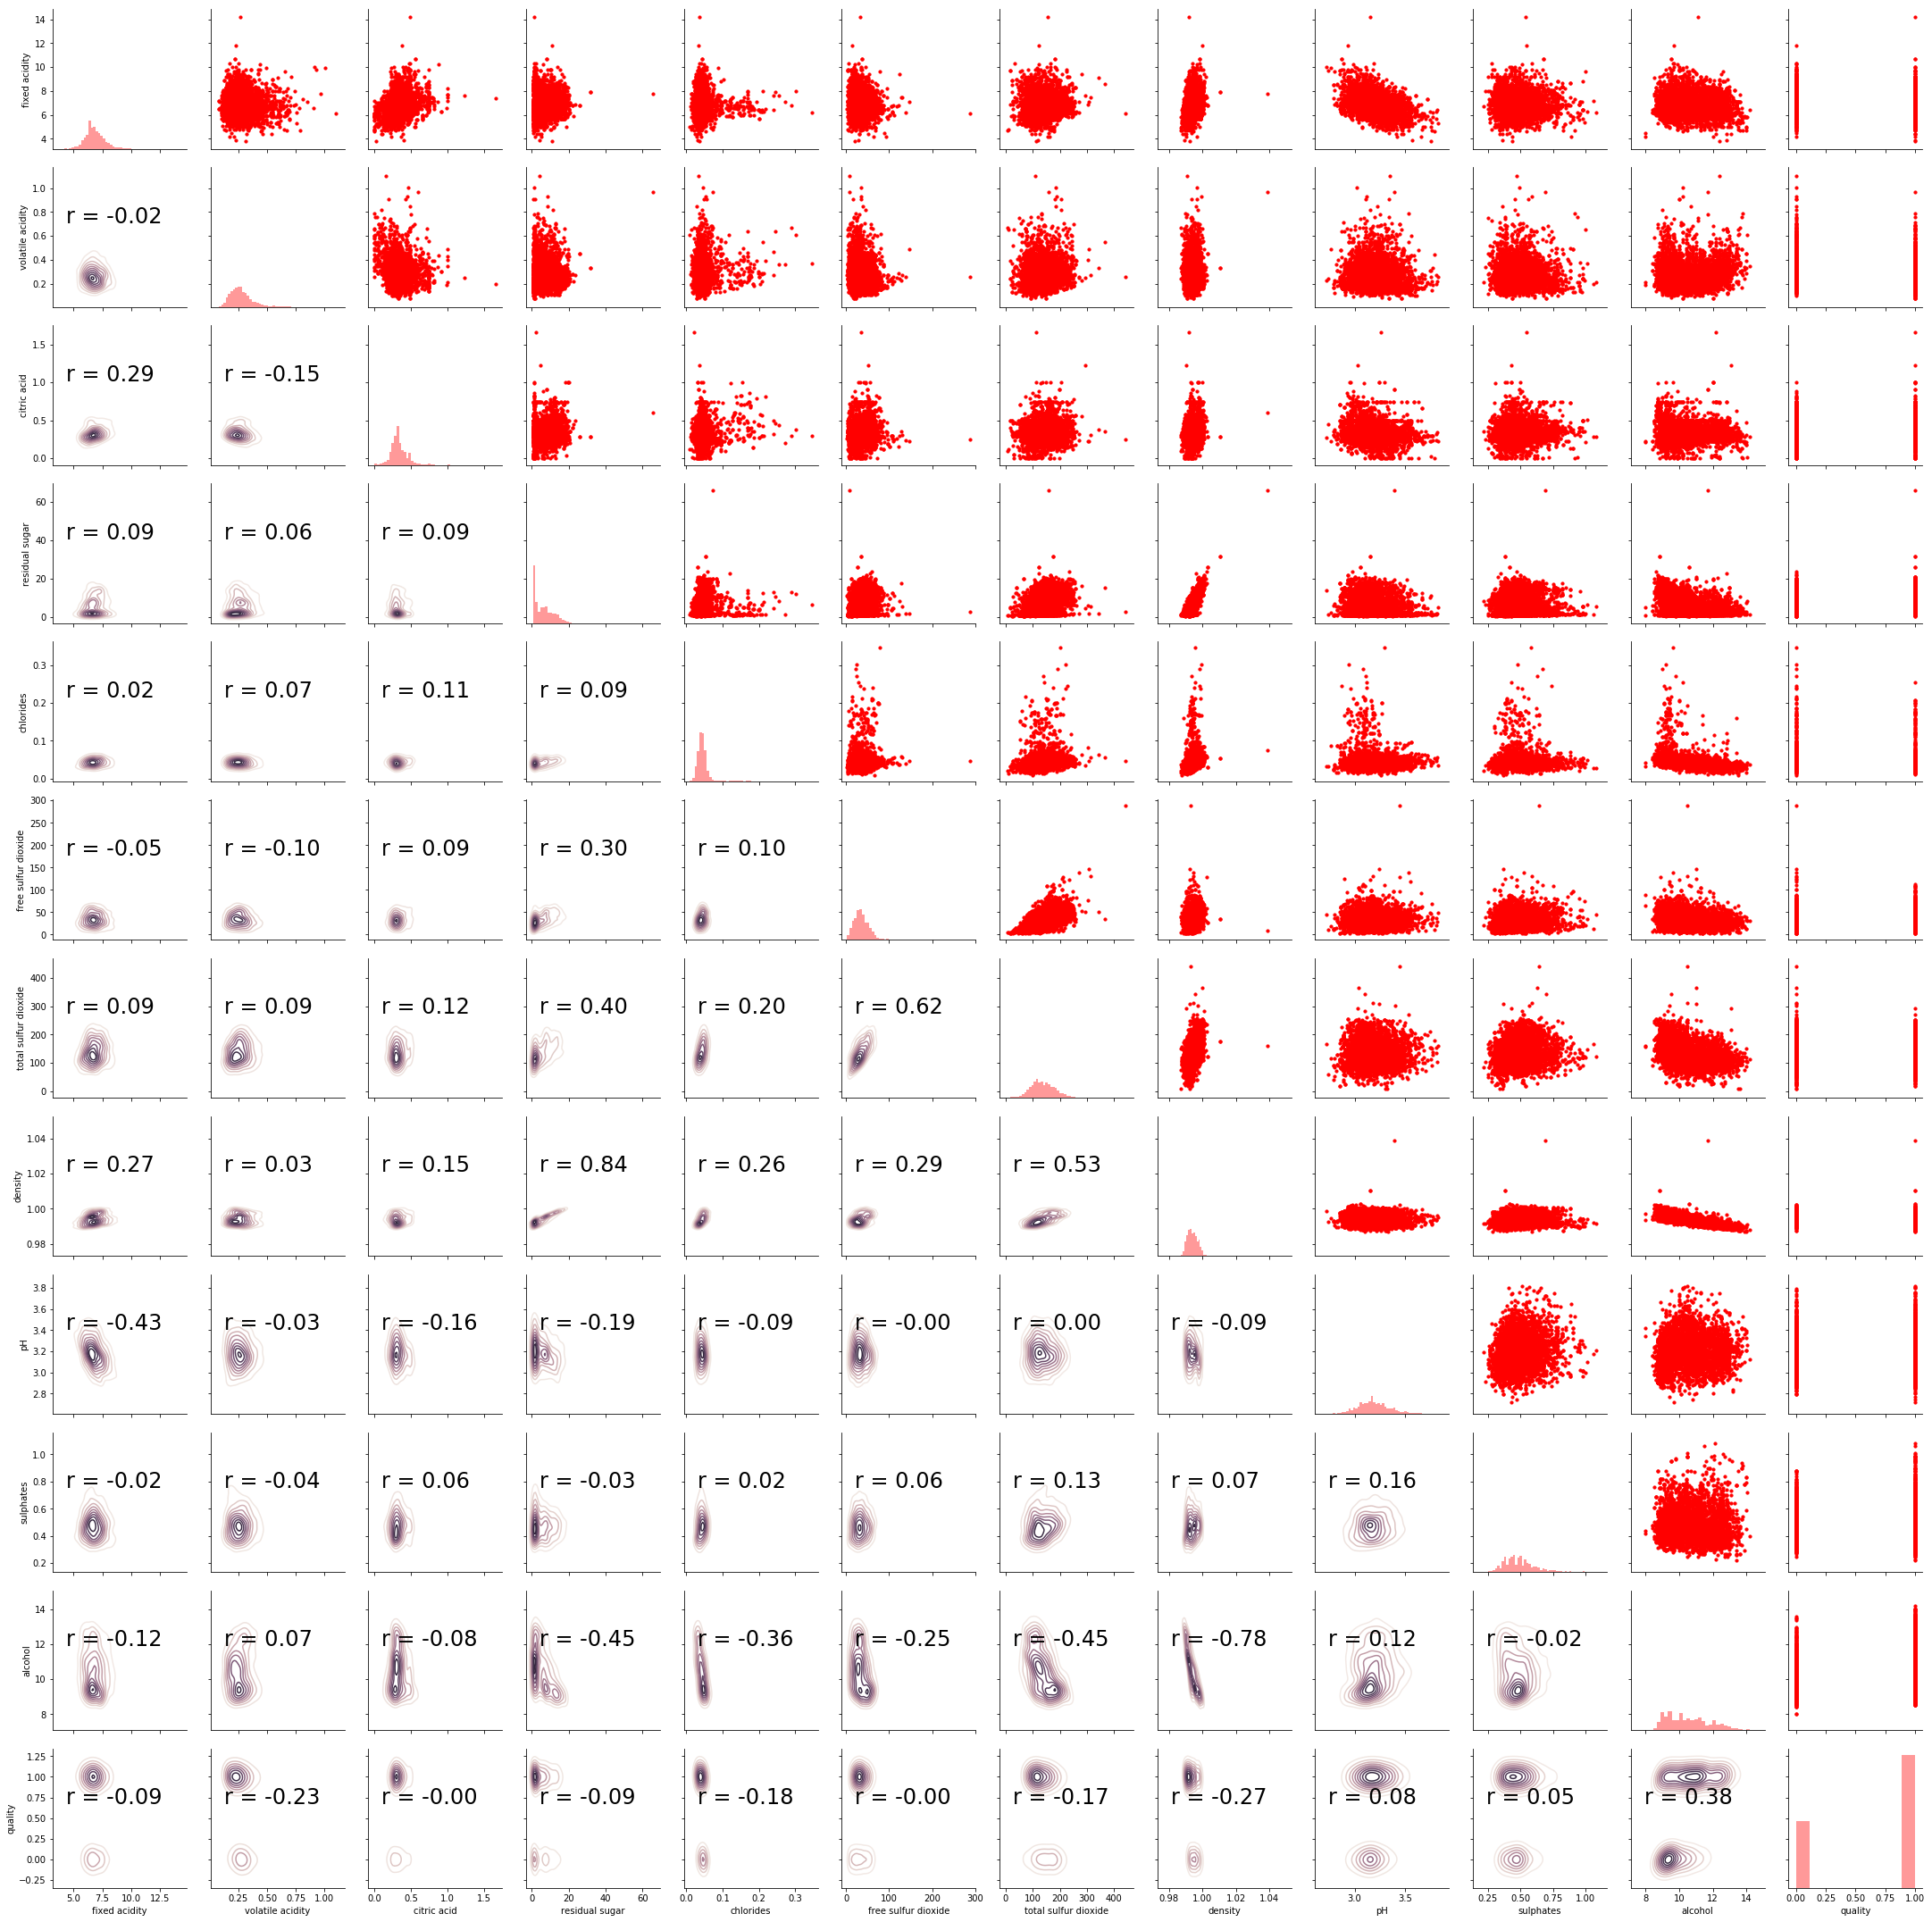

In [97]:
#14
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)
g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=10, color = 'red')


g.map_diag(sns.distplot, kde=False, color = 'red')


g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [98]:
np.abs(df.corr()['quality']).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.383280
density                 0.268696
volatile acidity        0.225440
chlorides               0.183939
total sulfur dioxide    0.170924
residual sugar          0.092756
fixed acidity           0.089749
pH                      0.083687
sulphates               0.051858
free sulfur dioxide     0.001278
citric acid             0.000700
Name: quality, dtype: float64

In [99]:
#15 
df=df.drop(columns =['free sulfur dioxide','citric acid'])

In [100]:
#16
def partition(data,target,t):
    train_data, test_data = np.split(data, [int((1-t)*len(data))])
    target_train,target_test = np.split(target, [int((1-t)*len(target))])
    return train_data,test_data,target_train,target_test

In [101]:
#17
X_train,X_test,Y_train,Y_test = partition(df.drop(columns ='quality').values,df['quality'].values,0.2)

In [102]:
#17
knn=knn_classifier()
knn.fit(X_train,Y_train,5,"Euclidean")
values = knn.predict(X_train)

In [103]:
#17
print("Accuracy and error ",cal_acc_gen(Y_train,values))

Accuracy and error  (0.7108218478815722, 0.2891781521184278)


In [104]:
cm = cal_con_matrix(Y_train,values)
f_p=cm[0][1]
f_n=cm[1][0]
t_n=cm[0][0]
t_p=cm[1][1]

In [105]:
print("Recision",cal_precision(t_p,f_p))
print("Recall",cal_recall(t_p,f_n))
print("F1 Score",cal_fscore(t_n,f_p,f_n,t_p))
print("Confusion Matrix",cm)

Recision 0.7600559636236446
Recall 0.8293893129770993
F1 Score 0.7932104398612885
Confusion Matrix [[ 612  686]
 [ 447 2173]]


In [106]:
#b
stand_df = df.drop(columns ='quality')
stand_df = ((stand_df-stand_df.mean())/stand_df.std()).values

In [107]:
#b
X_train,X_test,Y_train,Y_test = partition(stand_df,df['quality'].values,0.2)

In [108]:
#c
knn=knn_classifier()
knn.fit(X_train,Y_train,5,"Euclidean")
std_values = knn.predict(X_train)

In [109]:
#d
print("Accuracy and error for Standarized",cal_acc_gen(Y_train,std_values))

Accuracy and error for Standarized (0.7473200612557427, 0.2526799387442573)


In [110]:
print("Since the accuracy after standarizing is better so its better")

Since the accuracy after standarizing is better so its better


In [111]:
#extra credits
knn=knn_classifier()
knn.fit(X_train,Y_train,5,"Euclidean",0.5,"distance")
std_values = knn.predict(X_train)

In [144]:
print("Accuracy and error for Standarized and inverse distance",cal_acc_gen(Y_train,std_values))

Accuracy and error for Standarized and inverse distance (0.8039816232771823, 0.19601837672281774)


In [113]:
#18
def sfolds(folds,data,labels,model,model_args):
    values={}
    X_folds = np.array_split(data,folds)
    Y_folds = np.array_split(labels,folds)
    predicted = []
    error=0
    for X,Y in zip(X_folds,Y_folds):
        pred = sfolds_helper(X,Y,model,model_args)
        predicted.append(pred)
        error+=cal_f1_err(Y,pred)
    pred_values = np.asarray((predicted))
    pred_values=np.concatenate(pred_values,axis=0)
    values['exp']=labels
    values['pred']=pred_values
    values['avg_err']=error/folds
    return values 

In [114]:
def sfolds_helper(X,Y,model,model_args):
    model.fit(X,Y,**model_args)
    pred = model.predict(X)
    return pred

In [115]:
def cal_f1_err(exp,pred):
    err_cm = cal_con_matrix(exp,pred)
    t_n=err_cm[0][0]
    f_p=err_cm[0][1]
    f_n=err_cm[1][0]
    t_p=err_cm[1][1]
    return (1-cal_fscore(t_n,f_p,f_n,t_p))

In [116]:
k_arr = [1,5,9,11]
f_labels ={}
f_exp={}
f_err={}
dist = ["Euclidean","Manhattan"]
dist_type = ["uniform","distance"]
knn = knn_classifier()
for i in k_arr:
    for j in dist:
        for k in dist_type:
            arg = {"n_neighbor" : i,"distance":j,"weights":k}
            temp = sfolds(10,X_train,Y_train,knn,arg)
            f_labels[str(i)+j+k]=temp["pred"]
            f_exp[str(i)+j+k]=temp["exp"]
            f_err[str(i)+j+k]=temp["avg_err"]

In [126]:
min_error = 100
optimal_distance = ""
optimal_k = -1
for i in k_arr:
    for j in dist:
        for k in dist_type :
            f_a,f_b = cal_acc_gen(f_exp[str(i)+j+k],f_labels[str(i)+j+k])
            test_cm = cal_con_matrix(f_exp[str(i)+j+k],f_labels[str(i)+j+k])
            t_n=test_cm[0][0]
            f_p=test_cm[0][1]
            f_n=test_cm[1][0]
            t_p=test_cm[1][1]
            temp_f1score = cal_fscore(t_n,f_p,f_n,t_p) 
            print("Accuracy for %s %f "%((str(i)+" " +j+" "+k),f_a))
            print("Error for %s %f"%((str(i)+" "+j+" "+k),f_b))
            print("F1 score for %s %f \n"%((str(i)+" "+j+ " " +k),temp_f1score))
            if min_error > f_err[str(i)+j+k] and k!= "distance":
                min_error = f_err[str(i)+j+k]
                optimal_k = i
                optimal_distance = j
                optimal_type = k

Accuracy for 1 Euclidean uniform 0.688872 
Error for 1 Euclidean uniform 0.311128
F1 score for 1 Euclidean uniform 0.767144 

Accuracy for 1 Euclidean distance 0.688872 
Error for 1 Euclidean distance 0.311128
F1 score for 1 Euclidean distance 0.767144 

Accuracy for 1 Manhattan uniform 0.691679 
Error for 1 Manhattan uniform 0.308321
F1 score for 1 Manhattan uniform 0.770604 

Accuracy for 1 Manhattan distance 0.691679 
Error for 1 Manhattan distance 0.308321
F1 score for 1 Manhattan distance 0.770604 

Accuracy for 5 Euclidean uniform 0.715161 
Error for 5 Euclidean uniform 0.284839
F1 score for 5 Euclidean uniform 0.795455 

Accuracy for 5 Euclidean distance 0.726391 
Error for 5 Euclidean distance 0.273609
F1 score for 5 Euclidean distance 0.803231 

Accuracy for 5 Manhattan uniform 0.714906 
Error for 5 Manhattan uniform 0.285094
F1 score for 5 Manhattan uniform 0.794556 

Accuracy for 5 Manhattan distance 0.725625 
Error for 5 Manhattan distance 0.274375
F1 score for 5 Manhattan 

In [127]:
print(optimal_distance,optimal_k,optimal_type)

Manhattan 11 uniform


In [128]:
data_test=X_test
labels_test=Y_test

In [129]:
#20
arg = {"n_neighbor" : optimal_k,"distance":optimal_distance,"weights":'uniform'}
test_knn=knn_classifier()
test_knn.fit(data_test,labels_test,**arg)
t_value=test_knn.predict(data_test)


In [130]:
#20
test_cm = cal_con_matrix(labels_test,t_value)
t_n=test_cm[0][0]
f_p=test_cm[0][1]
f_n=test_cm[1][0]
t_p=test_cm[1][1]
test_pred = cal_precision(t_p,f_p)
test_recall = cal_recall(t_p,t_n)
test_f1score = cal_fscore(t_n,f_p,f_n,t_p)
test_acc,test_error = cal_acc_gen(labels_test,t_value)


In [131]:
print("Precisions: ",test_pred)
print("Recall :" , test_recall)
print("F1 score: ",test_f1score)
print("Confusion Matrix \n",test_cm)
print("Accuracy:",test_acc)
print("test_error",test_error)

Precisions:  0.7773109243697479
Recall : 0.7520325203252033
F1 score:  0.8210059171597633
Confusion Matrix 
 [[183 159]
 [ 83 555]]
Accuracy: 0.753061224489796
test_error 0.24693877551020404


In [132]:
#21
k =np.arange(0,1.1,0.1)
th_pred={}
for i in k:
    thresh_knn = knn_classifier()
    thresh_knn.fit(X_train,Y_train,optimal_k,optimal_distance,i,"uniform")
    th_pred[i]= thresh_knn.predict(X_train)

In [133]:
tpr = []
fpr = []
rec = []
pre = []
for i in k:
    cm = cal_con_matrix(Y_train,th_pred[i])
    t_n=cm[0][0]
    f_p=cm[0][1]
    f_n=cm[1][0]
    t_p=cm[1][1]
    tpr.append(cal_tpr(t_p,f_n))
    fpr.append(cal_fpr(f_p,t_n))
    rec.append(cal_recall(t_p,t_n))
    pre.append(cal_precision(t_p,f_p))

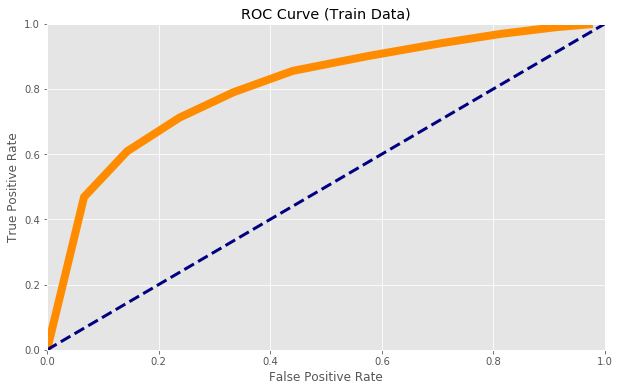

In [134]:
#22
plot_roc_curve(tpr,fpr)

In [135]:
#23
print("Area under the Curve is %0.4f: "%(get_auc(tpr[::-1],fpr[::-1])))

Area under the Curve is 0.7752: 


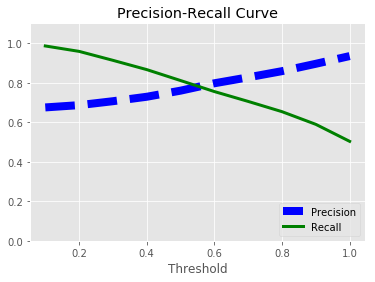

In [148]:
#24
plot_precision_recall_vs_threshold(pre, rec, k[1:])

In [149]:
#Since we dont have enough thresholds the value of precision and recall and are highly unlikely to intersect so from the graph
#we can get optimal threshold as 0.57
print("optimal threshold would be around 0.57")

optimal threshold would be around 0.57


In [137]:
#25
accuracy , generalization = cal_acc_gen(labels_test, t_value)
interval_lower_acc = accuracy - 1.96 * np.sqrt((accuracy*(1-generalization)) / t_value.shape[0])
interval_upper_acc = accuracy + 1.96 * np.sqrt((generalization*(1-generalization)) / t_value.shape[0])
interval_lower_gen = generalization - 1.96 * np.sqrt((generalization*(1-generalization)) / t_value.shape[0])
interval_upper_gen = generalization + 1.96 * np.sqrt((generalization*(1-generalization)) / t_value.shape[0])
print("95 percent confidence interval for Accuracy - \nLower  %0.3f \tUpper %0.3f"%(interval_lower_acc,interval_upper_acc))
print("95 percent confidence interval for Error - \nLower  %0.3f \tUpper %0.3f"%(interval_lower_gen,interval_upper_gen))

95 percent confidence interval for Accuracy - 
Lower  0.706 	Upper 0.780
95 percent confidence interval for Error - 
Lower  0.220 	Upper 0.274
